# liblary yang di butuhkan


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import random


# Implementasi Kalman Filter untuk Estimasi Posisi Robot

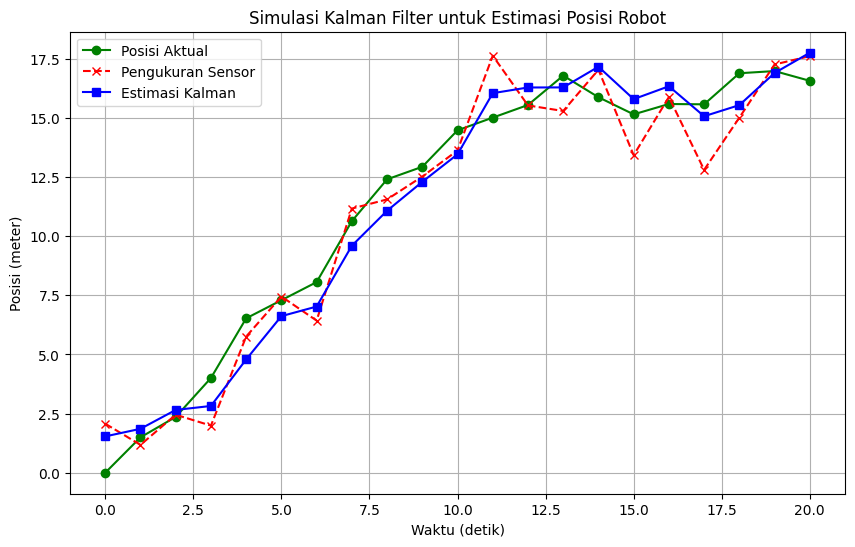

In [5]:
# Fungsi untuk menginisialisasi sistem
# Membuat posisi aktual robot, posisi estimasi, dan kecepatan aktual
np.random.seed(42)  # Seed untuk reproduksibilitas

# Parameter awal robot
pos_aktual = 0  # Posisi awal robot
kecepatan_aktual = 1  # Kecepatan konstan robot (m/s)
varian_sensor = 2  # Variansi dari pengukuran sensor
varian_proses = 1  # Variansi dari model proses

# Waktu simulasi
waktu_total = 20  # Dalam detik
dt = 1  # Interval waktu (detik)
waktu = np.arange(0, waktu_total + dt, dt)

# Fungsi simulasi sistem dinamis
# Posisi aktual bertambah dengan kecepatan tetap per waktu
posisi_aktual = [pos_aktual]
for t in waktu[1:]:
    noise_proses = np.random.normal(0, np.sqrt(varian_proses))  # Noise proses
    pos_aktual += kecepatan_aktual * dt + noise_proses
    posisi_aktual.append(pos_aktual)

# Simulasi pengukuran sensor dengan noise
pengukuran_sensor = [pos + np.random.normal(0, np.sqrt(varian_sensor)) for pos in posisi_aktual]

# Inisialisasi variabel untuk Kalman Filter
posisi_estimasi = []  # Hasil estimasi posisi
posisi_kalman = 0  # Nilai awal estimasi posisi
varian_kalman = 1  # Variansi awal estimasi posisi

# Implementasi Kalman Filter
for z in pengukuran_sensor:
    # **Prediksi**
    posisi_kalman_pred = posisi_kalman + kecepatan_aktual * dt  # Prediksi posisi
    varian_kalman_pred = varian_kalman + varian_proses  # Prediksi variansi

    # **Update**
    kalman_gain = varian_kalman_pred / (varian_kalman_pred + varian_sensor)  # Menghitung gain Kalman
    posisi_kalman = posisi_kalman_pred + kalman_gain * (z - posisi_kalman_pred)  # Update posisi estimasi
    varian_kalman = (1 - kalman_gain) * varian_kalman_pred  # Update variansi estimasi

    # Simpan hasil estimasi
    posisi_estimasi.append(posisi_kalman)

# Visualisasi hasil
plt.figure(figsize=(10, 6))

# Plot posisi aktual robot
plt.plot(waktu, posisi_aktual, label="Posisi Aktual", linestyle='-', marker='o', color='green')

# Plot pengukuran sensor
plt.plot(waktu, pengukuran_sensor, label="Pengukuran Sensor", linestyle='--', marker='x', color='red')

# Plot estimasi posisi dari Kalman Filter
plt.plot(waktu, posisi_estimasi, label="Estimasi Kalman", linestyle='-', marker='s', color='blue')

# Tambahkan elemen visualisasi
plt.title("Simulasi Kalman Filter untuk Estimasi Posisi Robot")
plt.xlabel("Waktu (detik)")
plt.ylabel("Posisi (meter)")
plt.legend()
plt.grid()

# Tampilkan plot
plt.show()


Kalman Filter adalah algoritma filtering berbasis probabilitas yang digunakan untuk memperkirakan keadaan suatu sistem dinamis. Dalam program ini, Kalman Filter digunakan untuk memperkirakan posisi robot berdasarkan model gerak linier sederhana dengan pengukuran sensor yang terpengaruh noise. Algoritma ini menggabungkan prediksi posisi dari model gerak dengan data pengukuran untuk menghasilkan estimasi posisi yang lebih akurat. Setiap iterasi terdiri dari dua tahap utama: prediksi, yang memprediksi keadaan berikutnya menggunakan model dinamis, dan update, yang memperbarui estimasi berdasarkan pengukuran sensor menggunakan Kalman Gain.



# Implementasi Particle Filter untuk Estimasi Posisi Robot


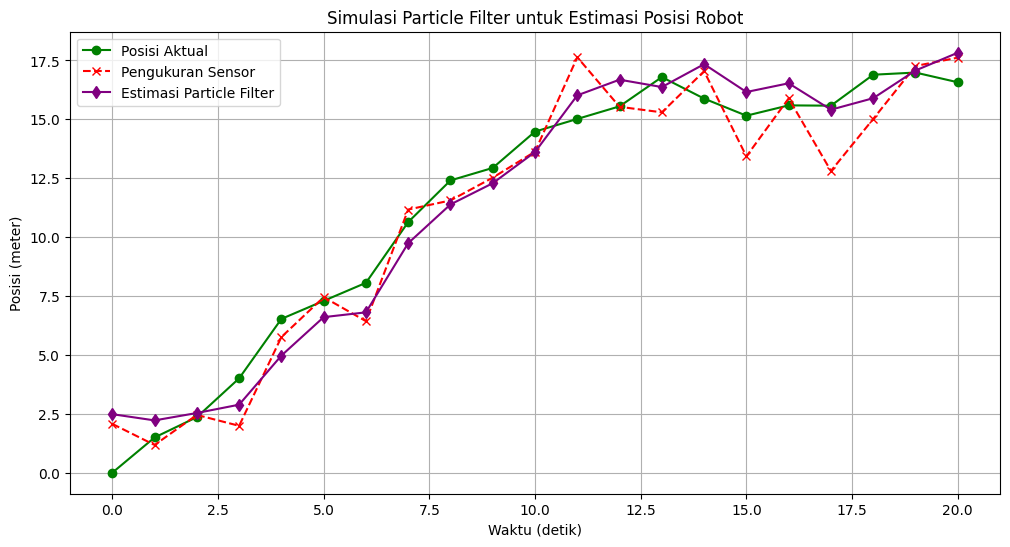

In [6]:
# Inisialisasi variabel untuk Particle Filter
num_particles = 100  # Jumlah partikel
particles = np.random.normal(0, 10, num_particles)  # Inisialisasi partikel secara acak
total_weights = np.ones(num_particles) / num_particles  # Bobot awal partikel (seragam)
posisi_estimasi_pf = []  # Estimasi posisi menggunakan Particle Filter

# Fungsi resampling partikel
def resample_particles(particles, weights):
    indices = np.random.choice(len(particles), size=len(particles), p=weights)
    return particles[indices]

# Implementasi Particle Filter
for z in pengukuran_sensor:
    # **Prediksi**
    particles += kecepatan_aktual * dt + np.random.normal(0, np.sqrt(varian_proses), num_particles)  # Update partikel

    # **Update**
    weights = np.exp(-0.5 * ((z - particles) ** 2) / varian_sensor)  # Hitung bobot berdasarkan pengukuran
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling
    particles = resample_particles(particles, weights)

    # Estimasi posisi berdasarkan rata-rata bobot
    posisi_estimasi_pf.append(np.average(particles, weights=weights))

# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Plot posisi aktual robot
plt.plot(waktu, posisi_aktual, label="Posisi Aktual", linestyle='-', marker='o', color='green')

# Plot pengukuran sensor
plt.plot(waktu, pengukuran_sensor, label="Pengukuran Sensor", linestyle='--', marker='x', color='red')

# Plot estimasi posisi dari Particle Filter
plt.plot(waktu, posisi_estimasi_pf, label="Estimasi Particle Filter", linestyle='-', marker='d', color='purple')

# Tambahkan elemen visualisasi
plt.title("Simulasi Particle Filter untuk Estimasi Posisi Robot")
plt.xlabel("Waktu (detik)")
plt.ylabel("Posisi (meter)")
plt.legend()
plt.grid()

# Tampilkan plot
plt.show()

Particle Filter adalah metode berbasis simulasi Monte Carlo untuk memperkirakan distribusi probabilitas suatu sistem dinamis. Dalam implementasi ini, posisi robot diperkirakan dengan memanfaatkan sekumpulan partikel yang merepresentasikan kemungkinan keadaan robot. Setiap partikel diperbarui berdasarkan model gerak, lalu dihitung bobotnya sesuai dengan kesesuaian terhadap pengukuran sensor. Resampling dilakukan untuk memastikan partikel fokus pada daerah yang paling relevan. Hasil akhirnya adalah estimasi posisi robot yang dihitung sebagai rata-rata berbobot dari posisi partikel.




# Localization dengan Sensor IMU dan Lidar


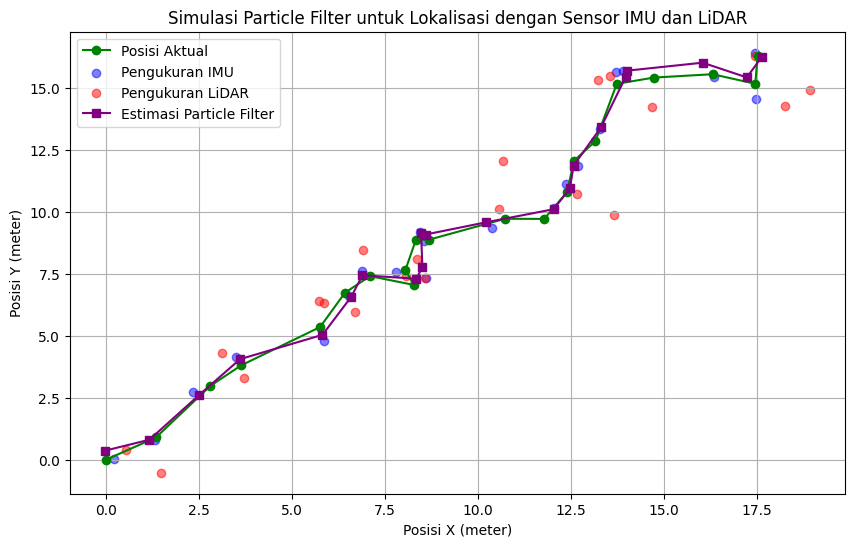

In [7]:
# Seed untuk reproduksibilitas
np.random.seed(42)

# Parameter simulasi
waktu_total = 20  # Waktu simulasi dalam detik
dt = 1  # Interval waktu
waktu = np.arange(0, waktu_total + dt, dt)

# Parameter sistem robot
pos_aktual = np.array([0, 0])  # Posisi aktual (x, y)
kecepatan_aktual = np.array([1, 1])  # Kecepatan tetap (vx, vy)
varian_proses = 0.5  # Variansi proses

# Parameter sensor
varian_imu = 0.1  # Variansi sensor IMU
varian_lidar = 1.0  # Variansi sensor LiDAR

# Simulasi posisi aktual robot
posisi_aktual = [pos_aktual]
for t in waktu[1:]:
    noise_proses = np.random.normal(0, np.sqrt(varian_proses), size=2)  # Noise proses
    pos_aktual = pos_aktual + kecepatan_aktual * dt + noise_proses
    posisi_aktual.append(pos_aktual)

posisi_aktual = np.array(posisi_aktual)

# Simulasi pengukuran sensor IMU dan LiDAR
pengukuran_imu = posisi_aktual + np.random.normal(0, np.sqrt(varian_imu), size=posisi_aktual.shape)
pengukuran_lidar = posisi_aktual + np.random.normal(0, np.sqrt(varian_lidar), size=posisi_aktual.shape)

# Inisialisasi Particle Filter
num_particles = 100
particles = np.random.uniform(-5, 5, (num_particles, 2))  # Partikel diinisialisasi secara acak
total_weights = np.ones(num_particles) / num_particles  # Bobot awal partikel
estimasi_pf = []

# Fungsi resampling partikel
def resample_particles(particles, weights):
    indices = np.random.choice(len(particles), size=len(particles), p=weights)
    return particles[indices]

# Implementasi Particle Filter
for z_imu, z_lidar in zip(pengukuran_imu, pengukuran_lidar):
    # **Prediksi**
    noise_proses = np.random.normal(0, np.sqrt(varian_proses), size=particles.shape)
    particles += kecepatan_aktual * dt + noise_proses

    # **Update**
    weights_imu = np.exp(-0.5 * np.sum((particles - z_imu)**2, axis=1) / varian_imu)
    weights_lidar = np.exp(-0.5 * np.sum((particles - z_lidar)**2, axis=1) / varian_lidar)
    weights = weights_imu * weights_lidar  # Kombinasi pengukuran IMU dan LiDAR
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling
    particles = resample_particles(particles, weights)

    # Estimasi posisi berdasarkan rata-rata bobot
    estimasi_pf.append(np.average(particles, axis=0, weights=weights))

estimasi_pf = np.array(estimasi_pf)

# Visualisasi hasil
plt.figure(figsize=(10, 6))

# Plot posisi aktual robot
plt.plot(posisi_aktual[:, 0], posisi_aktual[:, 1], label="Posisi Aktual", linestyle='-', marker='o', color='green')

# Plot pengukuran sensor IMU
plt.scatter(pengukuran_imu[:, 0], pengukuran_imu[:, 1], label="Pengukuran IMU", color='blue', alpha=0.5)

# Plot pengukuran sensor LiDAR
plt.scatter(pengukuran_lidar[:, 0], pengukuran_lidar[:, 1], label="Pengukuran LiDAR", color='red', alpha=0.5)

# Plot estimasi Particle Filter
plt.plot(estimasi_pf[:, 0], estimasi_pf[:, 1], label="Estimasi Particle Filter", linestyle='-', marker='s', color='purple')

# Tambahkan elemen visualisasi
plt.title("Simulasi Particle Filter untuk Lokalisasi dengan Sensor IMU dan LiDAR")
plt.xlabel("Posisi X (meter)")
plt.ylabel("Posisi Y (meter)")
plt.legend()
plt.grid()

# Tampilkan plot
plt.show()

Lokalization menggunakan IMU dan LiDAR bertujuan untuk menentukan posisi dan orientasi robot secara akurat dalam lingkungan tertentu. IMU (Inertial Measurement Unit) menyediakan data gerakan, seperti akselerasi dan rotasi, sementara LiDAR (Light Detection and Ranging) memberikan informasi jarak ke objek di sekitar robot. Program ini menggabungkan data dari kedua sensor dengan algoritma filtering, seperti Particle Filter, untuk mengestimasi posisi robot. Hasilnya adalah representasi posisi robot yang lebih stabil dan akurat meskipun terdapat noise dari sensor.



# Extended Kalman Filter (EKF) untuk Navigasi


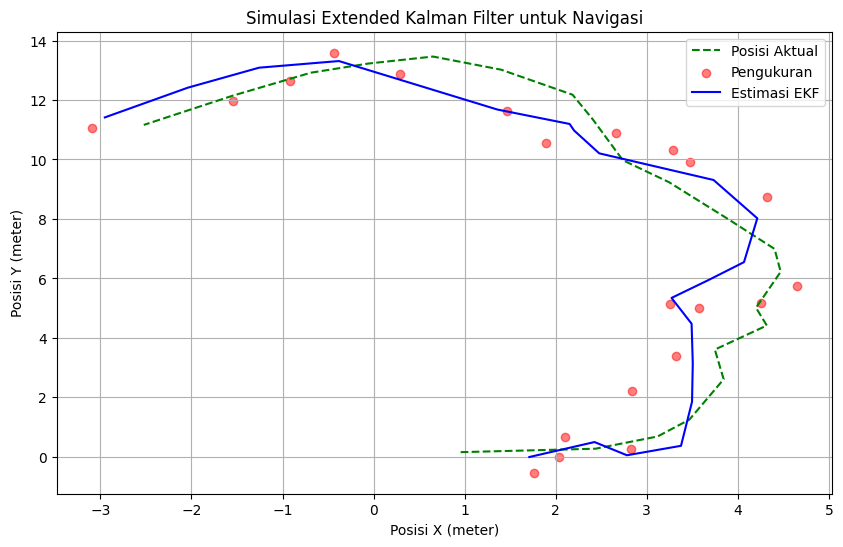

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def state_transition(x, u, dt):
    """Fungsi transisi keadaan untuk model robot sederhana."""
    x_new = np.zeros_like(x)
    theta = x[2]
    x_new[0] = x[0] + u[0] * np.cos(theta) * dt
    x_new[1] = x[1] + u[0] * np.sin(theta) * dt
    x_new[2] = x[2] + u[1] * dt
    return x_new

def jacobian_f(x, u, dt):
    """Jacobian dari fungsi transisi keadaan."""
    theta = x[2]
    F = np.array([
        [1, 0, -u[0] * np.sin(theta) * dt],
        [0, 1,  u[0] * np.cos(theta) * dt],
        [0, 0, 1]
    ])
    return F

def observation_model(x):
    """Model pengamatan yang mengukur posisi (x, y)."""
    return x[:2]

def jacobian_h(x):
    """Jacobian dari model pengamatan."""
    H = np.array([
        [1, 0, 0],
        [0, 1, 0]
    ])
    return H

# Parameter simulasi
np.random.seed(42)
dt = 1.0  # Interval waktu (detik)
waktu_total = 20
waktu = np.arange(0, waktu_total + dt, dt)

# Inisialisasi keadaan robot (x, y, theta)
x_actual = np.array([0, 0, 0])
x_estimate = np.array([0, 0, 0])

# Noise proses dan pengamatan
Q = np.diag([0.1, 0.1, np.deg2rad(5)])  # Kovarians noise proses
R = np.diag([0.5, 0.5])  # Kovarians noise pengamatan

# Kecepatan linear dan sudut robot
u = np.array([1.0, np.deg2rad(10)])

# Variabel untuk menyimpan hasil simulasi
positions_actual = []
positions_estimated = []
measurements = []

# Inisialisasi kovarians kesalahan estimasi
P = np.eye(3)

for t in waktu:
    # Simulasi gerakan robot
    noise_process = np.random.multivariate_normal([0, 0, 0], Q)
    x_actual = state_transition(x_actual, u, dt) + noise_process
    positions_actual.append(x_actual[:2])

    # Simulasi pengukuran sensor
    z = observation_model(x_actual) + np.random.multivariate_normal([0, 0], R)
    measurements.append(z)

    # EKF: Prediksi
    F = jacobian_f(x_estimate, u, dt)
    x_estimate = state_transition(x_estimate, u, dt)
    P = F @ P @ F.T + Q

    # EKF: Update
    H = jacobian_h(x_estimate)
    y = z - observation_model(x_estimate)  # Inovasi pengamatan
    S = H @ P @ H.T + R  # Kovarians inovasi
    K = P @ H.T @ np.linalg.inv(S)  # Gain Kalman
    x_estimate = x_estimate + K @ y
    P = (np.eye(len(P)) - K @ H) @ P

    # Simpan hasil estimasi
    positions_estimated.append(x_estimate[:2])

# Konversi ke array numpy untuk visualisasi
positions_actual = np.array(positions_actual)
positions_estimated = np.array(positions_estimated)
measurements = np.array(measurements)

# Visualisasi hasil
plt.figure(figsize=(10, 6))

# Plot posisi aktual
plt.plot(positions_actual[:, 0], positions_actual[:, 1], label="Posisi Aktual", color="green", linestyle="--")

# Plot pengukuran
plt.scatter(measurements[:, 0], measurements[:, 1], label="Pengukuran", color="red", alpha=0.5)

# Plot estimasi EKF
plt.plot(positions_estimated[:, 0], positions_estimated[:, 1], label="Estimasi EKF", color="blue")

# Elemen visualisasi tambahan
plt.title("Simulasi Extended Kalman Filter untuk Navigasi")
plt.xlabel("Posisi X (meter)")
plt.ylabel("Posisi Y (meter)")
plt.legend()
plt.grid()

# Tampilkan plot
plt.show()


EKF adalah versi non-linier dari Kalman Filter yang digunakan untuk memperkirakan keadaan sistem dengan model dinamis yang tidak linier. Dalam implementasi ini, EKF digunakan untuk navigasi robot yang bergerak dalam lintasan melingkar sederhana. Algoritma ini mencakup dua tahap utama: prediksi, di mana posisi robot diprediksi berdasarkan model gerak non-linier, dan update, yang memperbarui estimasi dengan pengukuran posisi aktual dari sensor. Jacobian digunakan untuk mengaproksimasi fungsi non-linier, sehingga memungkinkan estimasi akurat meskipun modelnya kompleks.



# Particle Filter untuk Navigasi

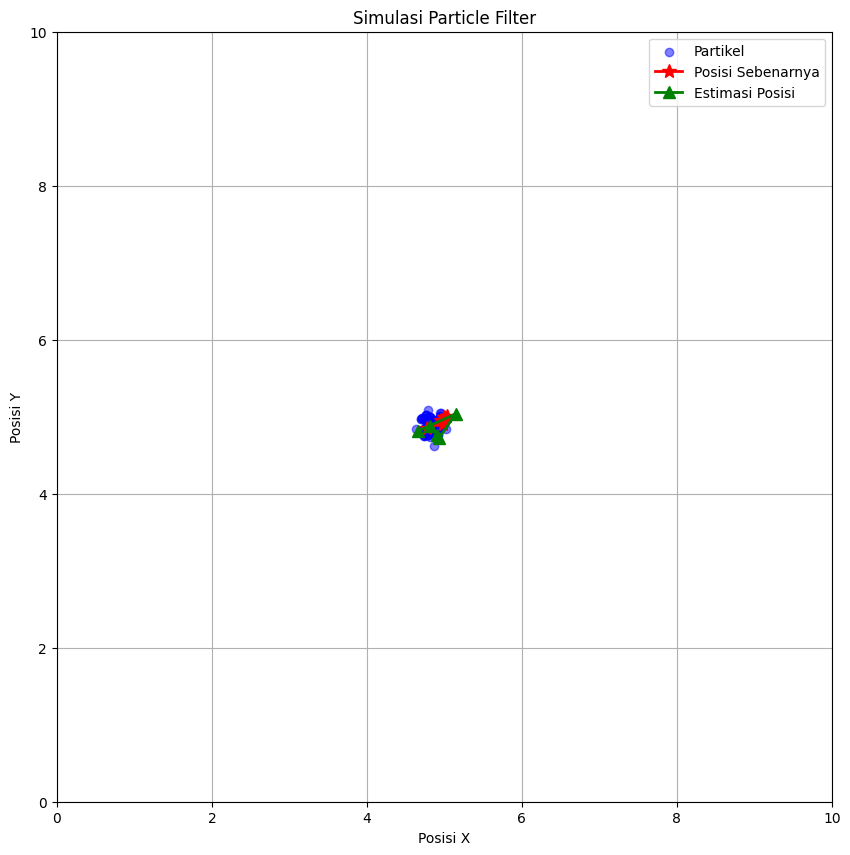

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class ParticleFilter:
    def __init__(self, num_particles=100):
        # Inisialisasi jumlah partikel
        self.num_particles = num_particles

        # Inisialisasi posisi partikel secara acak dalam ruang 2D
        self.particles = np.random.uniform(0, 10, (num_particles, 2))

        # Bobot awal untuk setiap partikel (sama rata)
        self.weights = np.ones(num_particles) / num_particles

        # Posisi target yang sebenarnya
        self.true_position = np.array([5.0, 5.0])

        # Noise untuk pengukuran sensor
        self.measurement_noise = 0.1

        # Noise untuk pergerakan
        self.motion_noise = 0.2

    def move_particles(self):
        # Menggerakkan partikel-partikel dengan menambahkan noise
        self.particles += np.random.normal(0, self.motion_noise, self.particles.shape)

    def update_weights(self):
        # Simulasi pengukuran sensor dengan menambahkan noise
        measurement = self.true_position + np.random.normal(0, self.measurement_noise, 2)

        # Hitung jarak setiap partikel ke pengukuran
        distances = np.linalg.norm(self.particles - measurement, axis=1)

        # Update bobot menggunakan fungsi Gaussian
        self.weights = np.exp(-distances**2 / (2 * self.measurement_noise**2))

        # Normalisasi bobot
        self.weights /= np.sum(self.weights)

    def resample(self):
        # Resampling partikel berdasarkan bobot
        cumsum = np.cumsum(self.weights)
        cumsum[-1] = 1.0

        # Generate titik awal acak
        positions = (np.random.random() + np.arange(self.num_particles)) / self.num_particles

        # Resampling
        indexes = np.searchsorted(cumsum, positions)

        # Update partikel
        self.particles = self.particles[indexes]

        # Reset bobot
        self.weights = np.ones(self.num_particles) / self.num_particles

    def estimate_position(self):
        # Estimasi posisi dari rata-rata tertimbang partikel
        return np.average(self.particles, weights=self.weights, axis=0)

# Buat instance ParticleFilter
pf = ParticleFilter(num_particles=100)

# Lakukan beberapa iterasi untuk simulasi
n_iterations = 5
estimated_positions = []
true_positions = []

for _ in range(n_iterations):
    # Simpan posisi sebenarnya
    true_positions.append(pf.true_position.copy())

    # Update particle filter
    pf.move_particles()
    pf.update_weights()
    pf.resample()

    # Simpan estimasi posisi
    estimated_positions.append(pf.estimate_position())

    # Gerakkan target sedikit
    pf.true_position += np.random.normal(0, 0.1, 2)

# Konversi ke array numpy untuk plotting
estimated_positions = np.array(estimated_positions)
true_positions = np.array(true_positions)

# Buat plot
plt.figure(figsize=(10, 10))

# Plot partikel dengan ukuran berdasarkan bobot
plt.scatter(pf.particles[:, 0], pf.particles[:, 1],
           c='blue', alpha=0.5, label='Partikel')

# Plot trajectory posisi sebenarnya
plt.plot(true_positions[:, 0], true_positions[:, 1],
         'r-*', label='Posisi Sebenarnya', linewidth=2, markersize=10)

# Plot trajectory estimasi
plt.plot(estimated_positions[:, 0], estimated_positions[:, 1],
         'g-^', label='Estimasi Posisi', linewidth=2, markersize=8)

plt.title('Simulasi Particle Filter')
plt.xlabel('Posisi X')
plt.ylabel('Posisi Y')
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.show()

Dalam konteks navigasi, Particle Filter digunakan untuk memperkirakan posisi robot dalam lingkungan yang lebih dinamis. Program ini mensimulasikan navigasi robot menggunakan partikel yang diperbarui sesuai dengan kecepatan gerak robot dan orientasi. Setiap partikel dinilai berdasarkan seberapa dekat posisinya dengan data pengukuran sensor. Setelah itu, resampling dilakukan untuk menjaga relevansi partikel. Teknik ini sangat cocok untuk sistem non-linier atau non-Gaussian, dan mampu menghasilkan estimasi posisi yang robust meskipun terdapat banyak noise pada sensor.







